In [2]:
import pandas as pd

#### Importing our dataset

In [3]:
ed= pd.read_csv("ED_data.csv")

C:\Users\joels\AppData\Local\Temp\ipykernel_15000\3294125238.py:1: DtypeWarning: Columns (31,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  ed= pd.read_csv("ED_data.csv")


#### Exploring our data

#### Checking for NULL values

In [4]:
ed.isnull().sum()

subject_id                  0
stay_id                     0
seq_num                     0
icd_code                    0
icd_version                 0
icd_title                   0
hadm_id                 19090
intime                      0
outtime                     0
gender                      0
race                        0
arrival_transport           0
disposition                 0
charttime_medecron        723
name_medecron             723
gsn_medecron              723
ndc                       723
etc_rn                    723
etccode                   723
etcdescription            723
charttime_pyxis          1279
med_rn                   1279
name_pyxis               1279
gsn_rn                   1280
gsn_pyxis                1976
temp_triage              1168
heartrate_triage         1147
resprate_triage          1147
o2sat_triage             2107
sbp_triage               1147
dbp_triage               1147
pain_triage              1453
acuity                    397
chiefcompl

#### Converting our in-time, out-time, charttime_x, charttime_y, charttime to date time

In [5]:
print(ed[['intime', 'outtime', 'charttime_medecron','charttime_pyxis','charttime_vitalsign']])

                  intime           outtime charttime_medecron  \
0       2137-10-08 18:16  2137-10-08 21:20                NaN   
1       2137-10-08 18:16  2137-10-08 21:20                NaN   
2       2137-10-08 18:16  2137-10-08 21:20                NaN   
3       2201-10-30 10:48  2201-10-30 12:25                NaN   
4        2174-05-26 4:20   2174-05-26 9:18    2174-05-26 4:45   
...                  ...               ...                ...   
124627  2148-06-29 21:06   2148-06-30 2:27   2148-06-29 21:38   
124628  2148-06-29 21:06   2148-06-30 2:27   2148-06-29 21:38   
124629  2148-06-29 21:06   2148-06-30 2:27   2148-06-29 21:38   
124630  2148-06-29 21:06   2148-06-30 2:27   2148-06-29 21:38   
124631  2148-06-29 21:06   2148-06-30 2:27   2148-06-29 21:38   

         charttime_pyxis charttime_vitalsign  
0       2137-10-08 18:34                 NaN  
1       2137-10-08 19:15                 NaN  
2       2137-10-08 19:15                 NaN  
3                    NaN       

In [4]:

ed['intime'] = pd.to_datetime(ed['intime'])

# Convert 'outtime' column to datetime
ed['outtime'] = pd.to_datetime(ed['outtime'])

# Convert 'charttime_x' column to datetime
ed['charttime_medecron'] = pd.to_datetime(ed['charttime_medecron'])

# Convert 'charttime_y' column to datetime
ed['charttime_pyxis'] = pd.to_datetime(ed['charttime_pyxis'])

# Convert 'charttime' column to datetime
ed['charttime_vitalsign'] = pd.to_datetime(ed['charttime_vitalsign'])



In [5]:

def Time_diff(row):
    if pd.notna(row['charttime_medecron']):
        return row['charttime_medecron'] - row['intime']
    elif pd.notna(row['charttime_pyxis']):
        return row['charttime_pyxis'] - row['intime']
    elif pd.notna(row['charttime_vitalsign']):
        return row['charttime_vitalsign'] - row['intime']
    else:
        return None

# Apply the function to create the new column
ed['wait_time'] = ed.apply(Time_diff, axis=1)



In [6]:
ed.wait_time.isnull().sum()

5

In [7]:
ed.wait_time.sample(5)

50677    0 days 01:00:00
28226    0 days 00:38:00
85759    0 days 00:28:00
3304     0 days 00:25:00
123656   0 days 00:34:00
Name: wait_time, dtype: timedelta64[ns]

In [8]:
ed.dropna(subset=['wait_time'], inplace=True)
ed.columns


Index(['subject_id', 'stay_id', 'seq_num', 'icd_code', 'icd_version',
       'icd_title', 'hadm_id', 'intime', 'outtime', 'gender', 'race',
       'arrival_transport', 'disposition', 'charttime_medecron',
       'name_medecron', 'gsn_medecron', 'ndc', 'etc_rn', 'etccode',
       'etcdescription', 'charttime_pyxis', 'med_rn', 'name_pyxis', 'gsn_rn',
       'gsn_pyxis', 'temp_triage', 'heartrate_triage', 'resprate_triage',
       'o2sat_triage', 'sbp_triage', 'dbp_triage', 'pain_triage', 'acuity',
       'chiefcomplaint', 'charttime_vitalsign', 'temperature_VS',
       'heartrate_VS', 'resprate_VS', 'o2sat_VS', 'sbp_VS', 'dbp_VS', 'rhythm',
       'pain_VS', 'wait_time'],
      dtype='object')

In [9]:
import pandas as pd

# Assuming ed is your DataFrame
ed['wait_time_minutes'] = ed['wait_time'].dt.total_seconds() / 60

# Replace negative wait times with 0
ed['wait_time_minutes'] = ed['wait_time_minutes'].clip(lower=0)


In [13]:
ed.wait_time_minutes.sample(5)

69504      28.0
107676    178.0
28762      68.0
86217      28.0
68760      28.0
Name: wait_time_minutes, dtype: float64

C:\Users\joels\AppData\Local\Temp\ipykernel_12664\1340274127.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ed.corr()


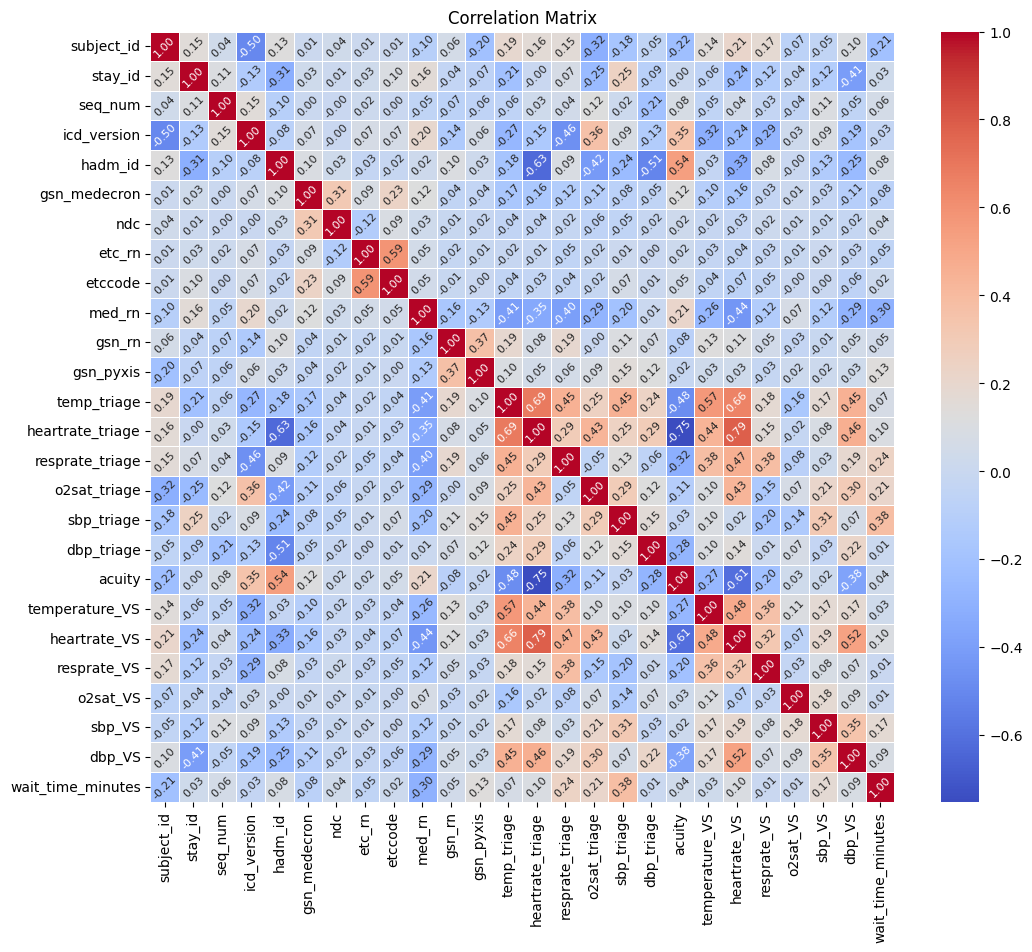

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = ed.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8, "rotation": 45})
plt.title('Correlation Matrix')
plt.show()



In [15]:
ed.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 124627 entries, 0 to 124631
Data columns (total 45 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   subject_id           124627 non-null  int64          
 1   stay_id              124627 non-null  int64          
 2   seq_num              124627 non-null  int64          
 3   icd_code             124627 non-null  object         
 4   icd_version          124627 non-null  int64          
 5   icd_title            124627 non-null  object         
 6   hadm_id              105538 non-null  float64        
 7   intime               124627 non-null  datetime64[ns] 
 8   outtime              124627 non-null  datetime64[ns] 
 9   gender               124627 non-null  object         
 10  race                 124627 non-null  object         
 11  arrival_transport    124627 non-null  object         
 12  disposition          124627 non-null  object         
 13 

#### EDA b4 ML

In [10]:
df = ed

In [11]:
n_rows = df.shape[0]
cols_lessthan5 = []
for col in df.columns:
    missing = df[col].isnull().sum()
    percentage = missing/n_rows * 100
    if percentage<5 and percentage > 0:
        print(f"{col} - {percentage}")
        cols_lessthan5.append(col)

charttime_medecron - 0.5761191395123046
name_medecron - 0.5761191395123046
gsn_medecron - 0.5761191395123046
ndc - 0.5761191395123046
etc_rn - 0.5761191395123046
etccode - 0.5761191395123046
etcdescription - 0.5761191395123046
charttime_pyxis - 1.0222503951792148
med_rn - 1.0222503951792148
name_pyxis - 1.0222503951792148
gsn_rn - 1.0230527895239394
gsn_pyxis - 1.581519253452302
temp_triage - 0.9331846229147777
heartrate_triage - 0.9163343416755598
resprate_triage - 0.9163343416755598
o2sat_triage - 1.6866329126112318
sbp_triage - 0.9163343416755598
dbp_triage - 0.9163343416755598
pain_triage - 1.1618670111613054
acuity - 0.31453858313206606
chiefcomplaint - 0.0008023943447246583
charttime_vitalsign - 1.197974756673915
heartrate_VS - 2.7690628836447964
sbp_VS - 4.566426215828031
dbp_VS - 4.566426215828031


In [12]:
df.dropna(subset = cols_lessthan5, inplace = True)

df.shape

(114608, 45)

In [13]:
n_rows = df.shape[0]
cols_morethan5 = []
for col in df.columns:
    missing = df[col].isnull().sum()
    percentage = missing/n_rows * 100
    if percentage>=5:
        print(f"{col} - {percentage}")
        cols_morethan5.append(col)

hadm_id - 15.634161664107218
temperature_VS - 52.3462585508865
rhythm - 96.04826888175346
pain_VS - 26.887302806086833


In [14]:
df.drop(columns=['subject_id','hadm_id', 'rhythm', 'intime', 'outtime', 'charttime_medecron', 'charttime_pyxis', 'charttime_vitalsign', 'stay_id'], inplace = True)
df.sample(5)

,seq_num,icd_code,icd_version,icd_title,gender,race,arrival_transport,disposition,name_medecron,gsn_medecron,...,chiefcomplaint,temperature_VS,heartrate_VS,resprate_VS,o2sat_VS,sbp_VS,dbp_VS,pain_VS,wait_time,wait_time_minutes
44721,1,R51,10,Headache,M,WHITE,AMBULANCE,HOME,aspirin,16995.0,...,"Confusion, s/p Fall",98.2,104.0,16.0,98.0,160.0,80.0,5,0 days 01:00:00,60.0
73002,3,E119,10,Type 2 diabetes mellitus without complications,M,WHITE,AMBULANCE,HOME,simvastatin,16578.0,...,"Chest pain, Transfer",97.8,60.0,14.0,99.0,128.0,56.0,NaN,0 days 00:28:00,28.0
18490,2,W1830XA,10,"Fall on same level, unspecified, initial encou...",M,WHITE,AMBULANCE,ADMITTED,Lantus U-100 Insulin,47780.0,...,"L Leg pain, s/p Fall",98.2,98.0,18.0,96.0,106.0,64.0,7,0 days 02:24:00,144.0
84818,4,E780,10,Pure hypercholesterolemia,M,WHITE,AMBULANCE,HOME,capsaicin,6017.0,...,"Chest pain, Transfer",NaN,57.0,14.0,99.0,127.0,55.0,7.0,0 days 00:28:00,28.0
124088,3,I313,10,Pericardial effusion (noninflammatory),M,WHITE,AMBULANCE,ADMITTED,Mapap (acetaminophen),4473.0,...,"Chest pain, Transfer",NaN,128.0,15.0,98.0,126.0,75.0,8.0,0 days 00:32:00,32.0


In [15]:
df.temperature_VS.describe()

count    54615.000000
mean        97.944118
std          0.593238
min         96.200000
25%         97.700000
50%         97.800000
75%         98.100000
max        102.400000
Name: temperature_VS, dtype: float64

In [16]:
df.resprate_VS.describe()

count    110468.000000
mean         17.156281
std           2.417614
min           9.000000
25%          16.000000
50%          16.000000
75%          18.000000
max          32.000000
Name: resprate_VS, dtype: float64

In [17]:
df.o2sat_VS.describe()

count    109885.000000
mean         98.173090
std           1.360028
min          92.000000
25%          97.000000
50%          98.000000
75%          99.000000
max         100.000000
Name: o2sat_VS, dtype: float64

In [18]:
df.pain_VS.describe()

count     83793.0
unique       23.0
top           9.0
freq      20980.0
Name: pain_VS, dtype: float64

#### Filling the NULL Values with mean


In [19]:
df['temperature_VS'].fillna(df.temperature_VS.mean(), inplace = True)
df['resprate_VS'].fillna(df.temperature_VS.mean(), inplace = True)
df['o2sat_VS'].fillna(df.temperature_VS.mean(), inplace = True)

In [20]:
mode_pain = ed['pain_VS'].mode()[0]  # Calculate the mode
ed['pain_VS'].fillna(mode_pain, inplace=True)  # Fill null values with the mode inplace

In [21]:
df.isnull().sum()

seq_num              0
icd_code             0
icd_version          0
icd_title            0
gender               0
race                 0
arrival_transport    0
disposition          0
name_medecron        0
gsn_medecron         0
ndc                  0
etc_rn               0
etccode              0
etcdescription       0
med_rn               0
name_pyxis           0
gsn_rn               0
gsn_pyxis            0
temp_triage          0
heartrate_triage     0
resprate_triage      0
o2sat_triage         0
sbp_triage           0
dbp_triage           0
pain_triage          0
acuity               0
chiefcomplaint       0
temperature_VS       0
heartrate_VS         0
resprate_VS          0
o2sat_VS             0
sbp_VS               0
dbp_VS               0
pain_VS              0
wait_time            0
wait_time_minutes    0
dtype: int64

In [22]:
df.sample(3)

,seq_num,icd_code,icd_version,icd_title,gender,race,arrival_transport,disposition,name_medecron,gsn_medecron,...,chiefcomplaint,temperature_VS,heartrate_VS,resprate_VS,o2sat_VS,sbp_VS,dbp_VS,pain_VS,wait_time,wait_time_minutes
66893,2,I10,10,Essential (primary) hypertension,M,WHITE,AMBULANCE,HOME,calcium carbonate-vitamin D3,64349.0,...,"Chest pain, Transfer",97.944118,64.0,21.000000,98.0,124.0,60.0,6.0,0 days 00:28:00,28.0
64964,2,I10,10,Essential (primary) hypertension,M,WHITE,AMBULANCE,HOME,gabapentin,21413.0,...,"Chest pain, Transfer",98.000000,56.0,97.944118,99.0,147.0,65.0,9.0,0 days 00:28:00,28.0
2696,2,80703,9,FRACTURE THREE RIBS-CLOS,M,WHITE,WALK IN,ADMITTED,amlodipine,16927.0,...,R RIB PAIN,97.944118,74.0,24.000000,96.0,155.0,92.0,8,0 days 01:09:00,69.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114608 entries, 5 to 124630
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   seq_num            114608 non-null  int64          
 1   icd_code           114608 non-null  object         
 2   icd_version        114608 non-null  int64          
 3   icd_title          114608 non-null  object         
 4   gender             114608 non-null  object         
 5   race               114608 non-null  object         
 6   arrival_transport  114608 non-null  object         
 7   disposition        114608 non-null  object         
 8   name_medecron      114608 non-null  object         
 9   gsn_medecron       114608 non-null  float64        
 10  ndc                114608 non-null  float64        
 11  etc_rn             114608 non-null  float64        
 12  etccode            114608 non-null  float64        
 13  etcdescription     114608 non

In [24]:
df.gender.value_counts()

M    112746
F      1862
Name: gender, dtype: int64

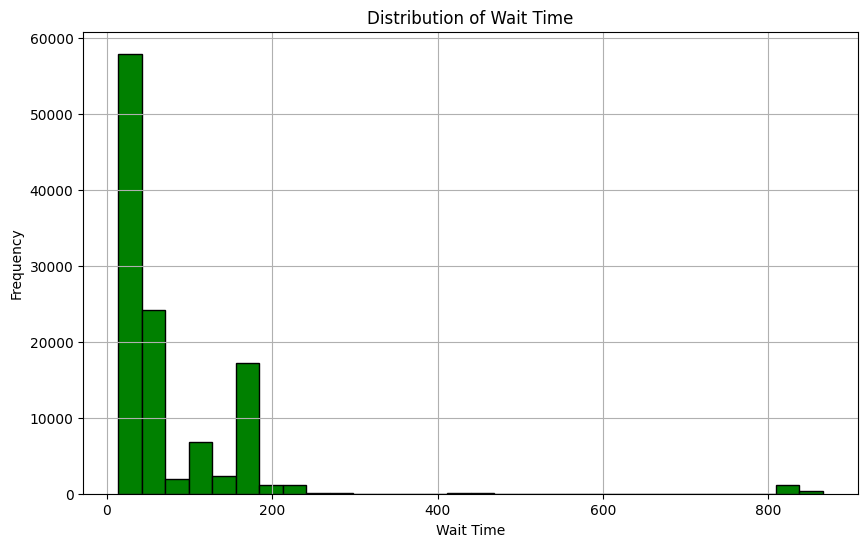

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(ed['wait_time_minutes'], bins=30, color='green', edgecolor='black')
plt.xlabel('Wait Time')
plt.ylabel('Frequency')
plt.title('Distribution of Wait Time')
plt.grid(True)
plt.show()

# Encoding

In [32]:
!pip install category_encoders

In [26]:
import category_encoders as ce
from category_encoders import *

In [27]:
df.columns

Index(['seq_num', 'icd_code', 'icd_version', 'icd_title', 'gender', 'race',
       'arrival_transport', 'disposition', 'name_medecron', 'gsn_medecron',
       'ndc', 'etc_rn', 'etccode', 'etcdescription', 'med_rn', 'name_pyxis',
       'gsn_rn', 'gsn_pyxis', 'temp_triage', 'heartrate_triage',
       'resprate_triage', 'o2sat_triage', 'sbp_triage', 'dbp_triage',
       'pain_triage', 'acuity', 'chiefcomplaint', 'temperature_VS',
       'heartrate_VS', 'resprate_VS', 'o2sat_VS', 'sbp_VS', 'dbp_VS',
       'pain_VS', 'wait_time', 'wait_time_minutes'],
      dtype='object')

In [28]:
# Encoding:
nominal_feat = ['gsn_rn', 'gsn_pyxis', 'med_rn', 'etc_rn', 'etccode', 'etcdescription', 'ndc', 'gsn_medecron', 'icd_code', 'icd_title', 'arrival_transport', 'race', 'pain_triage', 'disposition', 'name_medecron', 'name_pyxis', 'chiefcomplaint', 'pain_VS']
ordinal_feat = ['seq_num', 'acuity']
boolean_feat = ['icd_version', 'gender']

In [29]:
# Encode nominal features
count_encoder = ce.CountEncoder(cols=nominal_feat)
df_encoded = count_encoder.fit_transform(df)

In [30]:
df_encoded

,seq_num,icd_code,icd_version,icd_title,gender,race,arrival_transport,disposition,name_medecron,gsn_medecron,...,chiefcomplaint,temperature_VS,heartrate_VS,resprate_VS,o2sat_VS,sbp_VS,dbp_VS,pain_VS,wait_time,wait_time_minutes
5,1,66,9,66,M,108963,106312,22909,1447,1447,...,18,100.400000,89.0,31.0,94.0,106.0,64.0,54,0 days 00:25:00,25.0
6,1,66,9,66,M,108963,106312,22909,1447,1447,...,18,102.400000,105.0,30.0,95.0,123.0,67.0,12508,0 days 00:25:00,25.0
7,1,66,9,66,M,108963,106312,22909,1447,1447,...,18,97.944118,104.0,32.0,96.0,124.0,65.0,12508,0 days 00:25:00,25.0
9,1,66,9,66,M,108963,106312,22909,1447,1447,...,18,100.400000,89.0,31.0,94.0,106.0,64.0,54,0 days 00:25:00,25.0
10,1,66,9,66,M,108963,106312,22909,1447,1447,...,18,102.400000,105.0,30.0,95.0,123.0,67.0,12508,0 days 00:25:00,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124626,3,1561,10,1561,M,108963,106312,22909,1447,1447,...,44725,97.944118,130.0,24.0,99.0,100.0,58.0,51795,0 days 00:32:00,32.0
124627,3,1561,10,1561,M,108963,106312,22909,1447,1447,...,44725,102.400000,123.0,20.0,99.0,107.0,69.0,932,0 days 00:32:00,32.0
124628,3,1561,10,1561,M,108963,106312,22909,1447,1447,...,44725,97.944118,128.0,15.0,98.0,126.0,75.0,932,0 days 00:32:00,32.0
124629,3,1561,10,1561,M,108963,106312,22909,1447,1447,...,44725,98.900000,120.0,16.0,96.0,120.0,71.0,932,0 days 00:32:00,32.0


In [31]:
# Encode ordinal features
ordinal_encoder = ce.OrdinalEncoder(cols=ordinal_feat)
df_encoded = ordinal_encoder.fit_transform(df_encoded)

In [32]:
df_encoded

,seq_num,icd_code,icd_version,icd_title,gender,race,arrival_transport,disposition,name_medecron,gsn_medecron,...,chiefcomplaint,temperature_VS,heartrate_VS,resprate_VS,o2sat_VS,sbp_VS,dbp_VS,pain_VS,wait_time,wait_time_minutes
5,1,66,9,66,M,108963,106312,22909,1447,1447,...,18,100.400000,89.0,31.0,94.0,106.0,64.0,54,0 days 00:25:00,25.0
6,1,66,9,66,M,108963,106312,22909,1447,1447,...,18,102.400000,105.0,30.0,95.0,123.0,67.0,12508,0 days 00:25:00,25.0
7,1,66,9,66,M,108963,106312,22909,1447,1447,...,18,97.944118,104.0,32.0,96.0,124.0,65.0,12508,0 days 00:25:00,25.0
9,1,66,9,66,M,108963,106312,22909,1447,1447,...,18,100.400000,89.0,31.0,94.0,106.0,64.0,54,0 days 00:25:00,25.0
10,1,66,9,66,M,108963,106312,22909,1447,1447,...,18,102.400000,105.0,30.0,95.0,123.0,67.0,12508,0 days 00:25:00,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124626,3,1561,10,1561,M,108963,106312,22909,1447,1447,...,44725,97.944118,130.0,24.0,99.0,100.0,58.0,51795,0 days 00:32:00,32.0
124627,3,1561,10,1561,M,108963,106312,22909,1447,1447,...,44725,102.400000,123.0,20.0,99.0,107.0,69.0,932,0 days 00:32:00,32.0
124628,3,1561,10,1561,M,108963,106312,22909,1447,1447,...,44725,97.944118,128.0,15.0,98.0,126.0,75.0,932,0 days 00:32:00,32.0
124629,3,1561,10,1561,M,108963,106312,22909,1447,1447,...,44725,98.900000,120.0,16.0,96.0,120.0,71.0,932,0 days 00:32:00,32.0


In [33]:
# Encode boolean features
boolean_encoder = ce.OneHotEncoder(cols=boolean_feat)
df_encoded = boolean_encoder.fit_transform(df_encoded)

In [34]:
df_encoded

,seq_num,icd_code,icd_version_1,icd_version_2,icd_title,gender_1,gender_2,race,arrival_transport,disposition,...,chiefcomplaint,temperature_VS,heartrate_VS,resprate_VS,o2sat_VS,sbp_VS,dbp_VS,pain_VS,wait_time,wait_time_minutes
5,1,66,1,0,66,1,0,108963,106312,22909,...,18,100.400000,89.0,31.0,94.0,106.0,64.0,54,0 days 00:25:00,25.0
6,1,66,1,0,66,1,0,108963,106312,22909,...,18,102.400000,105.0,30.0,95.0,123.0,67.0,12508,0 days 00:25:00,25.0
7,1,66,1,0,66,1,0,108963,106312,22909,...,18,97.944118,104.0,32.0,96.0,124.0,65.0,12508,0 days 00:25:00,25.0
9,1,66,1,0,66,1,0,108963,106312,22909,...,18,100.400000,89.0,31.0,94.0,106.0,64.0,54,0 days 00:25:00,25.0
10,1,66,1,0,66,1,0,108963,106312,22909,...,18,102.400000,105.0,30.0,95.0,123.0,67.0,12508,0 days 00:25:00,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124626,3,1561,0,1,1561,1,0,108963,106312,22909,...,44725,97.944118,130.0,24.0,99.0,100.0,58.0,51795,0 days 00:32:00,32.0
124627,3,1561,0,1,1561,1,0,108963,106312,22909,...,44725,102.400000,123.0,20.0,99.0,107.0,69.0,932,0 days 00:32:00,32.0
124628,3,1561,0,1,1561,1,0,108963,106312,22909,...,44725,97.944118,128.0,15.0,98.0,126.0,75.0,932,0 days 00:32:00,32.0
124629,3,1561,0,1,1561,1,0,108963,106312,22909,...,44725,98.900000,120.0,16.0,96.0,120.0,71.0,932,0 days 00:32:00,32.0


In [35]:
df_encoded.sample(3).T

,66685,112937,21658
seq_num,2,5,6
icd_code,17950,2097,1426
icd_version_1,0,0,0
icd_version_2,1,1,1
icd_title,17950,2097,1426
gender_1,1,1,1
gender_2,0,0,0
race,108963,108963,108963
arrival_transport,106312,106312,106312
disposition,91265,91265,91265


In [36]:
df_encoded.sample(3)

,seq_num,icd_code,icd_version_1,icd_version_2,icd_title,gender_1,gender_2,race,arrival_transport,disposition,...,chiefcomplaint,temperature_VS,heartrate_VS,resprate_VS,o2sat_VS,sbp_VS,dbp_VS,pain_VS,wait_time,wait_time_minutes
42620,1,4995,0,1,4995,1,0,108963,106312,91265,...,19980,97.944118,72.0,15.0,100.0,150.0,61.0,7022,0 days 01:00:00,60.0
14983,1,504,0,1,504,1,0,5070,8296,22909,...,504,98.500000,76.0,18.0,99.0,158.0,91.0,1783,0 days 02:33:00,153.0
3219,1,72,0,1,72,0,1,108963,106312,91265,...,72,96.200000,74.0,18.0,100.0,142.0,75.0,12508,0 days 06:55:00,415.0


In [37]:
def sniff_modified(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['sample'] = df.iloc[0]
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        return info.sort_values('data type')

In [38]:
sniff_modified(df_encoded)

,sample,data type,percent missing,No. unique,unique values
seq_num,1,int32,0.0,7,"[1, 2, 3, 4, 5, 6, 7]"
acuity,1,int32,0.0,3,"[1, 2, 3]"
pain_VS,54,int64,0.0,22,"[54, 12508, 51795, 3424, 1783, 7022, 336, 396,..."
chiefcomplaint,18,int64,0.0,43,"[18, 1190, 15, 10, 576, 192, 72, 784, 208, 484..."
pain_triage,3393,int64,0.0,15,"[3393, 2289, 2094, 484, 2070, 252, 322, 2280, ..."
gsn_pyxis,3,int64,0.0,65,"[3, 685, 23, 3314, 926, 170, 529, 255, 2922, 1..."
name_pyxis,3,int64,0.0,79,"[3, 608, 23, 2304, 340, 529, 510, 346, 85, 69,..."
med_rn,9791,int64,0.0,15,"[9791, 12668, 10186, 8032, 11520, 5372, 3600, ..."
etcdescription,1870,int64,0.0,91,"[1870, 3756, 1234, 2586, 4779, 1323, 1792, 1, ..."
etccode,1870,int64,0.0,91,"[1870, 3756, 1234, 2586, 4779, 1323, 1792, 1, ..."


In [39]:
X = df_encoded.drop(['wait_time', 'wait_time_minutes'] ,axis =1)
y = df_encoded.wait_time_minutes

In [40]:
df_encoded.wait_time.describe()

count                       114608
mean     0 days 01:22:13.697996649
std      0 days 01:44:42.397001119
min                0 days 00:14:00
25%                0 days 00:28:00
50%                0 days 00:39:00
75%                0 days 02:06:00
max                0 days 14:26:00
Name: wait_time, dtype: object

In [41]:
df_encoded.wait_time_minutes.describe()

count    114608.000000
mean         82.228300
std         104.706617
min          14.000000
25%          28.000000
50%          39.000000
75%         126.000000
max         866.000000
Name: wait_time_minutes, dtype: float64

#### Machine learning

In [42]:
df_encoded.T

,5,6,7,9,10,11,13,14,15,17,...,124621,124622,124623,124624,124625,124626,124627,124628,124629,124630
seq_num,1,1,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
icd_code,66,66,66,66,66,66,66,66,66,66,...,1561,1561,1561,1561,1561,1561,1561,1561,1561,1561
icd_version_1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
icd_version_2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
icd_title,66,66,66,66,66,66,66,66,66,66,...,1561,1561,1561,1561,1561,1561,1561,1561,1561,1561
gender_1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
gender_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
race,108963,108963,108963,108963,108963,108963,108963,108963,108963,108963,...,108963,108963,108963,108963,108963,108963,108963,108963,108963,108963
arrival_transport,106312,106312,106312,106312,106312,106312,106312,106312,106312,106312,...,106312,106312,106312,106312,106312,106312,106312,106312,106312,106312
disposition,22909,22909,22909,22909,22909,22909,22909,22909,22909,22909,...,22909,22909,22909,22909,22909,22909,22909,22909,22909,22909


In [43]:
# Creating a new data frame from our correlation matrix

ada_1 = df_encoded[['wait_time_minutes', 'resprate_triage', 'o2sat_triage', 'sbp_triage', 'med_rn']]
ada_1

,wait_time_minutes,resprate_triage,o2sat_triage,sbp_triage,med_rn
5,25.0,18.0,96.0,126.0,9791
6,25.0,18.0,96.0,126.0,9791
7,25.0,18.0,96.0,126.0,9791
9,25.0,18.0,96.0,126.0,12668
10,25.0,18.0,96.0,126.0,12668
...,...,...,...,...,...
124626,32.0,16.0,96.0,120.0,11520
124627,32.0,16.0,96.0,120.0,11520
124628,32.0,16.0,96.0,120.0,11520
124629,32.0,16.0,96.0,120.0,11520


In [44]:
from sklearn.model_selection import train_test_split

X_1 = ada_1.drop(columns=['wait_time_minutes'])
y_1 = ada_1['wait_time_minutes']


In [45]:
# Split the dataset into training and testing sets
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape (X_1, y_1):", X_1_train.shape, y_1_train.shape)
print("Testing set shape (X_1, y_1):", X_1_test.shape, y_1_test.shape)

Training set shape (X_1, y_1): (91686, 4) (91686,)
Testing set shape (X_1, y_1): (22922, 4) (22922,)


In [46]:
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.tree import DecisionTreeRegressor as dtr

# Creating AdaBoostRegressor with DecisionTreeRegressor as base estimator
base_estimator = dtr(max_depth=4)
adaboost_regressor1 = abr(base_estimator=base_estimator, random_state=42)

# Fitting the model
adaboost_regressor1.fit(X_1_train, y_1_train)

c:\Users\joels\anaconda3\envs\DAB200\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  random_state=42)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict on the test set
y1_pred_abr1 = adaboost_regressor1.predict(X_1_test)

# Calculate evaluation metrics
mse_abr1 = mean_squared_error(y_1_test, y1_pred_abr1)
r2_abr1 = r2_score(y_1_test, y1_pred_abr1)
mae_abr1 = mean_absolute_error(y_1_test, y1_pred_abr1)

# Print evaluation metrics
print("AdaBoost Regressor Evaluation Report:")
print("Mean Squared Error:", mse_abr1)
print("R-squared Score:", r2_abr1)
print("Mean Absolute Error:", mae_abr1)


AdaBoost Regressor Evaluation Report:
Mean Squared Error: 741.15063834561
R-squared Score: 0.9346749354651341
Mean Absolute Error: 15.771533232230949


#### Finding the best parameters for our model

#### Building another model with all the features

In [49]:

X3 = df_encoded.drop(columns=['wait_time_minutes', 'wait_time'])
y3 = df_encoded['wait_time_minutes']

In [50]:
# Split the dataset into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape (X_1, y_1):", X3_train.shape, y3_train.shape)
print("Testing set shape (X_1, y_1):", X3_test.shape, y3_test.shape)

Training set shape (X_1, y_1): (91686, 36) (91686,)
Testing set shape (X_1, y_1): (22922, 36) (22922,)


In [51]:

# Creating AdaBoostRegressor with DecisionTreeRegressor as base estimator
base_estimator = dtr(max_depth=4)
adaboost_regressor3 = abr(base_estimator=base_estimator, random_state=42)

# Fitting the model
adaboost_regressor3.fit(X3_train, y3_train)

c:\Users\joels\anaconda3\envs\DAB200\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  random_state=42)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y3_pred_abr3 = adaboost_regressor3.predict(X3_test)

# Calculate evaluation metrics
mse_abr3 = mean_squared_error(y3_test, y3_pred_abr3)
mae_abr3 = mean_absolute_error(y3_test, y3_pred_abr3)
r2_abr3 = r2_score(y3_test, y3_pred_abr3)

# Print evaluation metrics
print("AdaBoost Regressor Evaluation Report:")
print("Mean Squared Error:", mse_abr3)
print("Mean Absolute Error:", mae_abr3)
print("R-squared Score:", r2_abr3)


AdaBoost Regressor Evaluation Report:
Mean Squared Error: 876.5587466695762
Mean Absolute Error: 19.9605161034153
R-squared Score: 0.9227400561610399


#### Feature Selection

In [60]:
from sklearn.feature_selection import SelectFromModel

# Create AdaBoostRegressor with DecisionTreeRegressor as base estimator
base_estimator = dtr(max_depth=4)
adaboost_regressor = abr(base_estimator=base_estimator, random_state=42)

# Fit AdaBoostRegressor model to the training data
adaboost_regressor.fit(X3_train, y3_train)

# Perform feature selection
feature_selection = SelectFromModel(adaboost_regressor, threshold='median')
feature_selection.fit(X3_train, y3_train)

# Get selected feature names
selected_feature_names = X3_train.columns[feature_selection.get_support()]

# Print selected feature names
print("Selected Feature Names:", selected_feature_names)


c:\Users\joels\anaconda3\envs\DAB200\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\joels\anaconda3\envs\DAB200\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Selected Feature Names: Index(['icd_version_1', 'race', 'arrival_transport', 'disposition',
       'name_medecron', 'gsn_medecron', 'ndc', 'name_pyxis', 'gsn_pyxis',
       'temp_triage', 'heartrate_triage', 'resprate_triage', 'o2sat_triage',
       'sbp_triage', 'dbp_triage', 'pain_triage', 'acuity', 'chiefcomplaint'],
      dtype='object')


In [61]:


# Assuming X3_train is your training feature matrix and y3_train is your target vector
# Replace X3_train and y3_train with your actual training data
model = abr()  # Define the AdaBoostRegressor model
model.fit(X3_train, y3_train)  # Fit the model

# Access feature importance
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X3_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)



# Display the DataFrame with importance values formatted as percentages
pd.set_option('display.float_format', lambda x: '%.1f' % (x * 100))
print(feature_importance_df)



              Feature  Importance
28     chiefcomplaint        17.4
25         dbp_triage        15.0
26        pain_triage        10.6
7                race         9.8
12                ndc         9.7
24         sbp_triage         8.9
20        temp_triage         6.4
9         disposition         5.5
21   heartrate_triage         4.5
23       o2sat_triage         3.8
8   arrival_transport         3.0
19          gsn_pyxis         2.7
11       gsn_medecron         0.6
22    resprate_triage         0.6
10      name_medecron         0.4
31        resprate_VS         0.4
33             sbp_VS         0.3
30       heartrate_VS         0.3
17         name_pyxis         0.2
34             dbp_VS         0.1
6            gender_2         0.0
15     etcdescription         0.0
14            etccode         0.0
29     temperature_VS         0.0
27             acuity         0.0
32           o2sat_VS         0.0
0             seq_num         0.0
18             gsn_rn         0.0
1            i

#### Creating a new model with our important features

In [53]:
ada_2 = df_encoded[['wait_time_minutes', 'chiefcomplaint', 'dbp_triage', 'pain_triage', 'sbp_triage', 'temp_triage', 'ndc', 'disposition']]
ada_2

,wait_time_minutes,chiefcomplaint,dbp_triage,pain_triage,sbp_triage,temp_triage,ndc,disposition
5,25.0,18,68.0,3393,126.0,99.0,1447,22909
6,25.0,18,68.0,3393,126.0,99.0,1447,22909
7,25.0,18,68.0,3393,126.0,99.0,1447,22909
9,25.0,18,68.0,3393,126.0,99.0,1447,22909
10,25.0,18,68.0,3393,126.0,99.0,1447,22909
...,...,...,...,...,...,...,...,...
124626,32.0,44725,71.0,2135,120.0,98.9,1447,22909
124627,32.0,44725,71.0,2135,120.0,98.9,1447,22909
124628,32.0,44725,71.0,2135,120.0,98.9,1447,22909
124629,32.0,44725,71.0,2135,120.0,98.9,1447,22909


In [54]:
X4 = ada_2.drop(columns=['wait_time_minutes'])
y4 = ada_2['wait_time_minutes']

In [55]:
# Split the dataset into training and testing sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape (X4, y4):", X4_train.shape, y4_train.shape)
print("Testing set shape (X4, y4):", X4_test.shape, y4_test.shape)

Training set shape (X4, y4): (91686, 7) (91686,)
Testing set shape (X4, y4): (22922, 7) (22922,)


In [56]:
# Creating AdaBoostRegressor with DecisionTreeRegressor as base estimator
base_estimator = dtr(max_depth=4)
adaboost_regressor4 = abr(base_estimator=base_estimator, random_state=42)

# Fitting the model
adaboost_regressor4.fit(X4_train, y4_train)

c:\Users\joels\anaconda3\envs\DAB200\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  random_state=42)

In [57]:
# Predict on the test set
y4_pred_abr4 = adaboost_regressor4.predict(X4_test)

# Calculate evaluation metrics
mse_abr4 = mean_squared_error(y4_test, y4_pred_abr4)
mae_abr4 = mean_absolute_error(y4_test, y4_pred_abr4)
r2_abr4 = r2_score(y4_test, y4_pred_abr4)

# Print evaluation metrics
print("AdaBoost Regressor Evaluation Report:")
print("Mean Squared Error:", mse_abr4)
print("Mean Absolute Error:", mae_abr4)
print("R-squared Score:", r2_abr4)

AdaBoost Regressor Evaluation Report:
Mean Squared Error: 829.9325668958752
Mean Absolute Error: 19.195781878609765
R-squared Score: 0.9268496906201429


#### Building our final model

In [58]:
X5 = ada_2.drop(columns=['wait_time_minutes'])
y5 = ada_2['wait_time_minutes']

In [59]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape (X5, y5):", X5_train.shape, y5_train.shape)
print("Testing set shape (X5, y5):", X5_test.shape, y5_test.shape)

Training set shape (X5, y5): (91686, 7) (91686,)
Testing set shape (X5, y5): (22922, 7) (22922,)


In [60]:
# Creating AdaBoostRegressor with DecisionTreeRegressor as base estimator
base_estimator = dtr(max_depth=8)
adaboost_regressor5 = abr(base_estimator = base_estimator, learning_rate= 1.0, n_estimators= 100, random_state=42)

# Fitting the model
adaboost_regressor5.fit(X5_train, y5_train)

c:\Users\joels\anaconda3\envs\DAB200\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=8),
                  n_estimators=100, random_state=42)

In [61]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict on the test set
y5_pred_abr5 = adaboost_regressor5.predict(X5_test)

# Calculate evaluation metrics
mse_abr5 = mean_squared_error(y5_test, y5_pred_abr5)
r2_abr5 = r2_score(y5_test, y5_pred_abr5)
mae_abr5 = mean_absolute_error(y5_test, y5_pred_abr5)

# Print evaluation metrics
print("AdaBoost Regressor Evaluation Report:")
print("Mean Squared Error:", mse_abr5)
print("R-squared Score:", r2_abr5)
print("Mean Absolute Error:", mae_abr5)


AdaBoost Regressor Evaluation Report:
Mean Squared Error: 56.27740052272504
R-squared Score: 0.9950397063285168
Mean Absolute Error: 1.811555612374744


In [62]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(adaboost_regressor5, file)

In [72]:
ada_2.chiefcomplaint.value_counts()

44725    44725
19980    19980
14455    14455
7728      7728
4860      4860
4250      4250
1824      1824
1644      1644
1200      1200
1190      1190
1188      1188
1152      1152
540       1080
1047      1047
504       1008
784        784
690        690
660        660
576        576
560        560
484        484
480        480
192        384
350        350
144        288
270        270
252        252
224        224
210        210
208        208
138        138
120        120
112        112
96          96
48          96
80          80
72          72
64          64
30          30
18          18
15          15
10          10
6            6
Name: chiefcomplaint, dtype: int64

In [74]:
complaints = ed.chiefcomplaint.value_counts()
complaints_dict = complaints.to_dict()
print(complaints_dict)

{'Chest pain, Transfer': 44725, 'Confusion, s/p Fall': 19980, 'R Leg pain, R Leg swelling': 14455, 'L Arm numbness, L Arm swelling': 7728, 'Epigastric pain': 4860, 'Coffee ground emesis': 4250, 'L Leg pain, s/p Fall': 1824, 'Abd pain, N/V': 1644, 'R Foot pain': 1200, 'Hematemesis': 1190, 'Chest pain, Nausea': 1188, 'Chest pain, N/V': 1152, 'Abnormal labs': 1047, 'Dyspnea': 784, 'Diarrhea, Hypotension': 690, 'Fatigue, s/p Fall': 660, 'R RIB PAIN': 576, 'LOWER EXTREMITY PAIN': 560, 'RLQ abdominal pain': 540, 'Right sided abdominal pain': 540, 'Abd pain, Right sided abdominal pain': 504, 'Abnormal labs, Hyperglycemia': 504, 'Tachycardia': 484, 'Abd pain, Diarrhea, Vomiting': 480, 'R FOOT ULCER/CELLULITIS': 350, 'Abd pain': 270, 'Dehydration, Nausea, Rash': 252, 'Psych eval': 224, 'Back pain, Decreased PO intake, R Ear pain': 210, 'DISLODGED ABD TUBE': 208, 'R Leg pain, Weakness': 192, 'Presyncope, Weakness': 192, 'Insomnia': 144, 'RIGHT FOOT INFECTION': 144, 'L Arm pain, L Arm swelling': 

In [63]:
ada_2.disposition.value_counts()

91265    91265
22909    22909
434        434
Name: disposition, dtype: int64

In [64]:
desp = ed.disposition.value_counts()
desp_dict = desp.to_dict()
print(desp_dict)

{'HOME': 91265, 'ADMITTED': 22909, 'TRANSFER': 434}


In [104]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Capstone_Group 10 (1).ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Capstone_Group 10 (1).ipynb to html
[NbConvertApp] Writing 1005808 bytes to /content/drive/MyDrive/Capstone_Group 10 (1).html
